In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!git version
!git clone https://github.com/Skane-Gahi/CESI_AI.git

git version 2.25.1
Cloning into 'CESI_AI'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 5), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), 10.06 MiB | 1.99 MiB/s, done.


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importation des différents jeu de données

In [ ]:
datasets_path = 'CESI_AI/Datasets'

general_data = pd.read_csv(datasets_path+'/general_data.csv')
in_time = pd.read_csv(datasets_path+'/in_time.csv')
out_time = pd.read_csv(datasets_path+'/out_time.csv')
manager_survey_data = pd.read_csv(datasets_path+'/manager_survey_data.csv')
employee_survey_data = pd.read_csv(datasets_path+'/employee_survey_data.csv')

In [ ]:
part = general_data.merge(manager_survey_data, on="EmployeeID", how="inner")
general =  part.merge(employee_survey_data, on="EmployeeID", how="inner")

# Soustraction des attributs non-nécessaires
On enlève les données liées à l'éthique.

In [ ]:
general.drop(['Age','DistanceFromHome','EmployeeID','Gender','JobLevel','MaritalStatus','NumCompaniesWorked','YearsAtCompany','YearsWithCurrManager','JobInvolvement','PerformanceRating','WorkLifeBalance','Over18','JobRole'], axis = 1, inplace = True)

# Prétraitement des données 


In [ ]:
general.describe()

,Education,EmployeeCount,MonthlyIncome,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction
count,4410.000000,4410.0,4410.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4385.000000,4390.000000
mean,2.912925,1.0,65029.312925,15.209524,8.0,0.793878,11.279936,2.799320,2.187755,2.723603,2.728246
std,1.023933,0.0,47068.888559,3.659108,0.0,0.851883,7.782222,1.288978,3.221699,1.092756,1.101253
min,1.000000,1.0,10090.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.000000,1.0,29110.000000,12.000000,8.0,0.000000,6.000000,2.000000,0.000000,2.000000,2.000000
50%,3.000000,1.0,49190.000000,14.000000,8.0,1.000000,10.000000,3.000000,1.000000,3.000000,3.000000
75%,4.000000,1.0,83800.000000,18.000000,8.0,1.000000,15.000000,3.000000,3.000000,4.000000,4.000000
max,5.000000,1.0,199990.000000,25.000000,8.0,3.000000,40.000000,6.000000,15.000000,4.000000,4.000000


Ici, nous avons une vue d'ensemble sur les statistiques des valeurs de notre jeu de données.

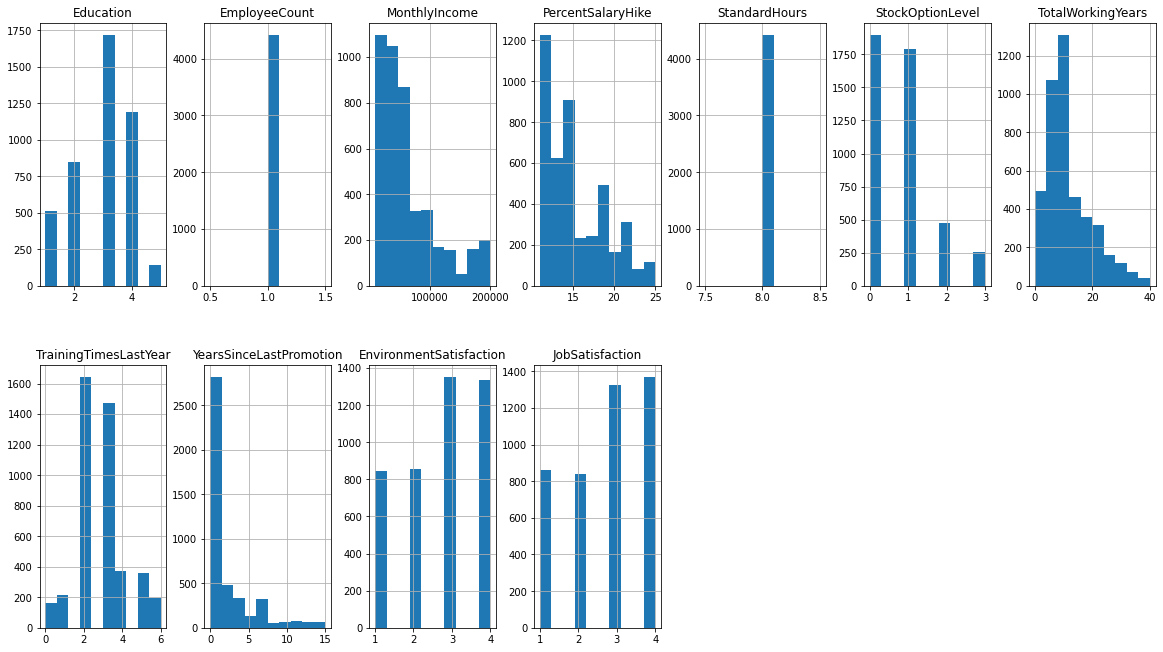

In [ ]:
#Histogramme pour chacun des attributs
ax = general.hist(figsize=(20,30),layout=(5,7))

Le tableau de statistiques ainsi que les différents histogrammes ci-dessus nous permettent de soustraire deux attributs : 
- "EmployeeCount" : Valeur constante à 1
- "StandardHours" : Valeur constante à 8

In [ ]:
general.drop(['EmployeeCount','StandardHours'], axis = 1, inplace = True)

Nous cherchons s'il y a des données manquantes. Affichons quelques exemples :

In [ ]:
sample_incomplete_rows = general[general.isnull().any(axis=1)].head()
sample_incomplete_rows.head()

,Attrition,BusinessTravel,Department,Education,EducationField,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction
11,No,Travel_Rarely,Research & Development,1,Life Sciences,33770,12,2,16.0,2,10,NaN,4.0
23,No,Travel_Rarely,Research & Development,4,Life Sciences,89260,14,0,NaN,4,11,2.0,3.0
40,No,Travel_Frequently,Research & Development,3,Other,69620,12,2,4.0,2,0,3.0,NaN
111,No,Travel_Rarely,Research & Development,3,Life Sciences,28670,24,0,3.0,5,2,NaN,2.0
124,Yes,Travel_Frequently,Sales,3,Life Sciences,75100,18,3,7.0,3,0,3.0,NaN


En effet, nous remarquons des données manquantes dans nos données ("Nan"). De ce fait, nous insérerons la valeur médiane de l'attribut, dans l'optique de garder une certaine cohérence des exemples. Ce traitement sera effectué dans le pipeline de traitement des données.

## Convertion des labels "Attrition" (employé a quitté l'entreprise oui/non)
Pour utiliser les données, nous souhaitons obtenir des valeurs numériques.
Commençons par récupérer la colonne "Attrition" :

In [ ]:
general_attr = general[["Attrition"]]
general_attr.head

<bound method NDFrame.head of      Attrition
0           No
1          Yes
2           No
3           No
4           No
...        ...
4405        No
4406        No
4407        No
4408        No
4409        No

[4410 rows x 1 columns]>

Grâce à l'outil **OrdinalEncoder**, nous assignons automatiquement les valeurs suivantes: 
- Yes ✈ 1
- No  ✈ 0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
label = ordinal_encoder.fit_transform(general_attr)

Nous remplaçons les données textuelles par du binaire dans le jeu de données pour l'attribut "Attrition".

In [ ]:
general['Attrition'] = label
general.head()

,Attrition,BusinessTravel,Department,Education,EducationField,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction
0,0.0,Travel_Rarely,Sales,2,Life Sciences,131160,11,0,1.0,6,0,3.0,4.0
1,1.0,Travel_Frequently,Research & Development,1,Life Sciences,41890,23,1,6.0,3,1,3.0,2.0
2,0.0,Travel_Frequently,Research & Development,4,Other,193280,15,3,5.0,2,0,2.0,2.0
3,0.0,Non-Travel,Research & Development,5,Life Sciences,83210,11,3,13.0,5,7,4.0,4.0
4,0.0,Travel_Rarely,Research & Development,1,Medical,23420,12,2,9.0,2,0,4.0,1.0


# Interpretation des données
## Matrice de corrélation
Pour définir les attributs qui ont le plus d'importance.
Les variables d'un jeu de données peuvent être liées deux à deux, c'est pourquoi on calcule leur corrélation.
Pour un jeu de données de petite taille tel que le notre, on peut calculer la matrice de corrélation avec corr() et en afficher une série, par exemple celle correspondant à la variable median_income :

In [ ]:
corr_matrix = abs(general.corr())
corr_matrix["Attrition"]

Attrition                  1.000000
Education                  0.015111
MonthlyIncome              0.031176
PercentSalaryHike          0.032533
StockOptionLevel           0.006839
TotalWorkingYears          0.170338
TrainingTimesLastYear      0.049431
YearsSinceLastPromotion    0.033019
EnvironmentSatisfaction    0.102142
JobSatisfaction            0.102847
Name: Attrition, dtype: float64

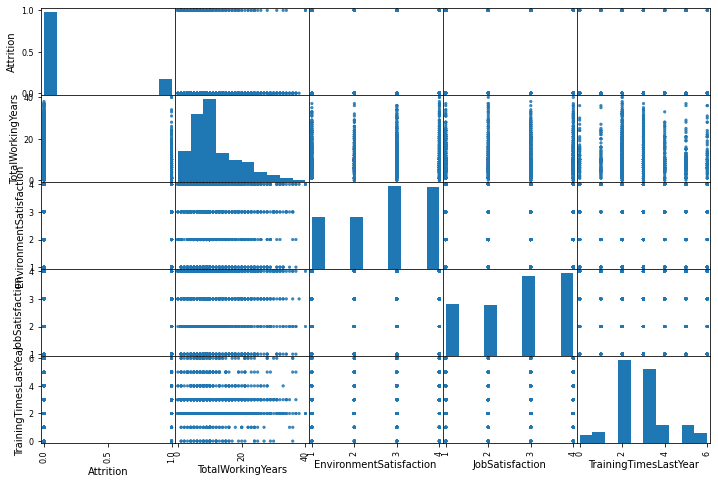

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Attrition","TotalWorkingYears","EnvironmentSatisfaction","JobSatisfaction","TrainingTimesLastYear"]
ax = scatter_matrix(general[attributes], figsize=(12, 8))

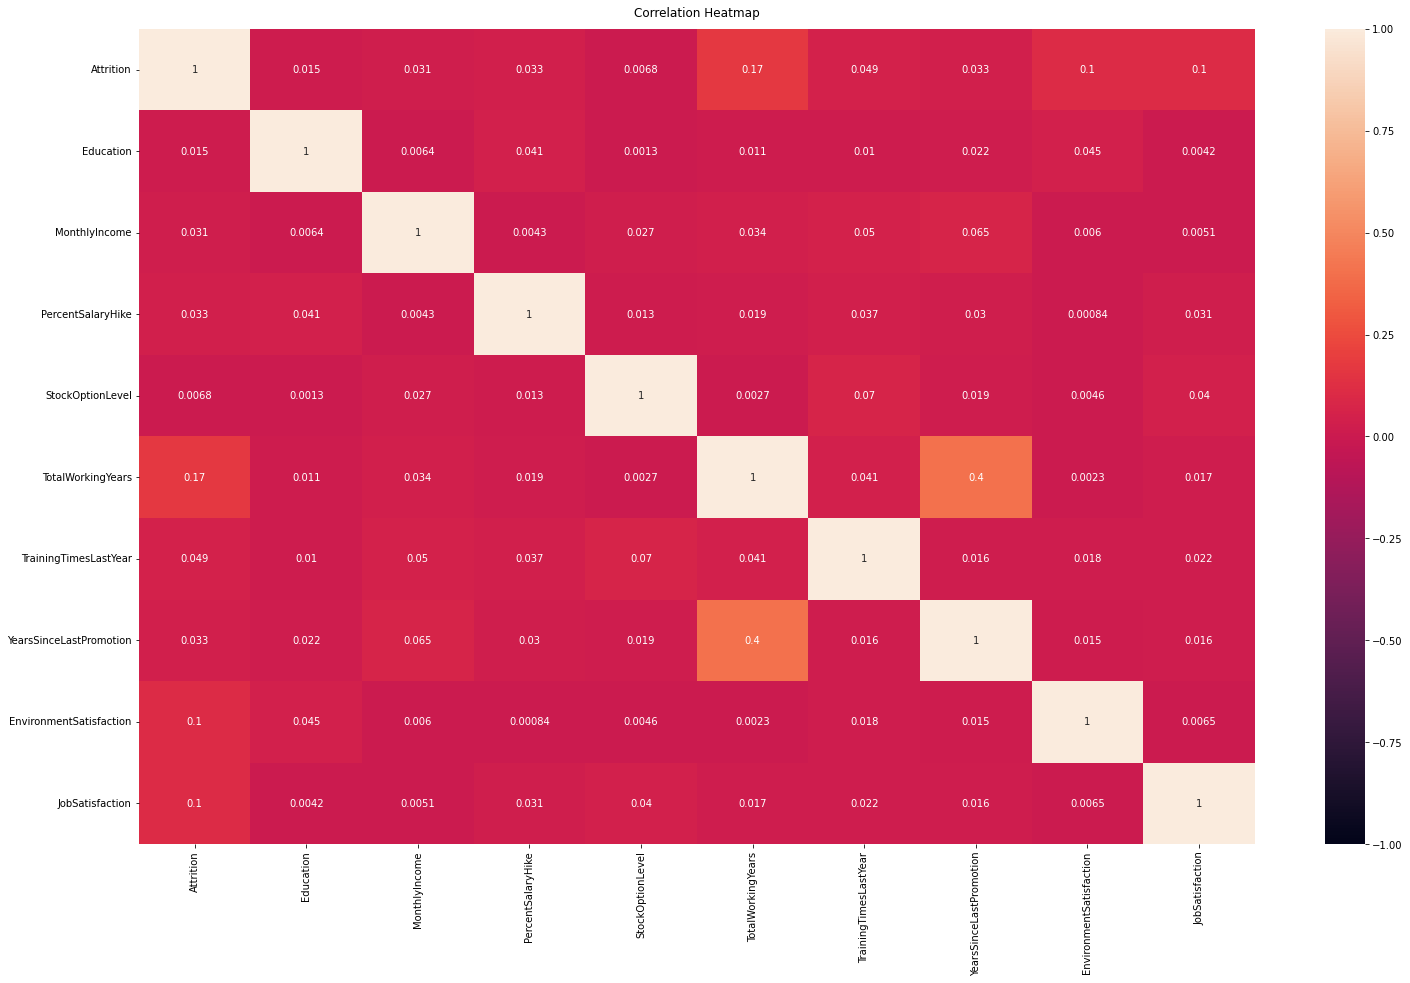

In [ ]:
import seaborn as sns

# Increase the size of the heatmap.
plt.figure(figsize=(25, 15))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(abs(general.corr()), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
general.drop(['Attrition'], axis = 1, inplace = True)

#Pipeline prétraitement

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())
    ])

general_num = general.select_dtypes(include=[np.number]) 
num_attribs = list(general_num)
cat_attribs = ["BusinessTravel",	"Department", "EducationField"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])


general_prepared = full_pipeline.fit_transform(general)

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_) 
cat_one_hot_attribs


[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object),
 array(['Human Resources', 'Research & Development', 'Sales'], dtype=object),
 array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object)]

# Dataset split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
s.get_n_splits(general_prepared, label)

for train_index, test_index in s.split(general_prepared, label):
  X_train, X_test = general_prepared[train_index], general_prepared[test_index]
  y_train, y_test = label[train_index], label[test_index]

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


# Modèle SVC linéaire
Pour optimiser chacun des modèles sélectionnées, nous utilisons GridSearchCV pour automatiser les tests avec différents hyper-paramètres. Il faut lui fournir les valeurs à tester pour chaque hyperparamètre.

In [22]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01,0.1, 1, 10, 100, 1000]}

linsvc = LinearSVC()
linearSVC = GridSearchCV(linsvc,param_grid,cv=10,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)

{'C': 0.01}


Text(0.5, 0, 'Feature Importance')

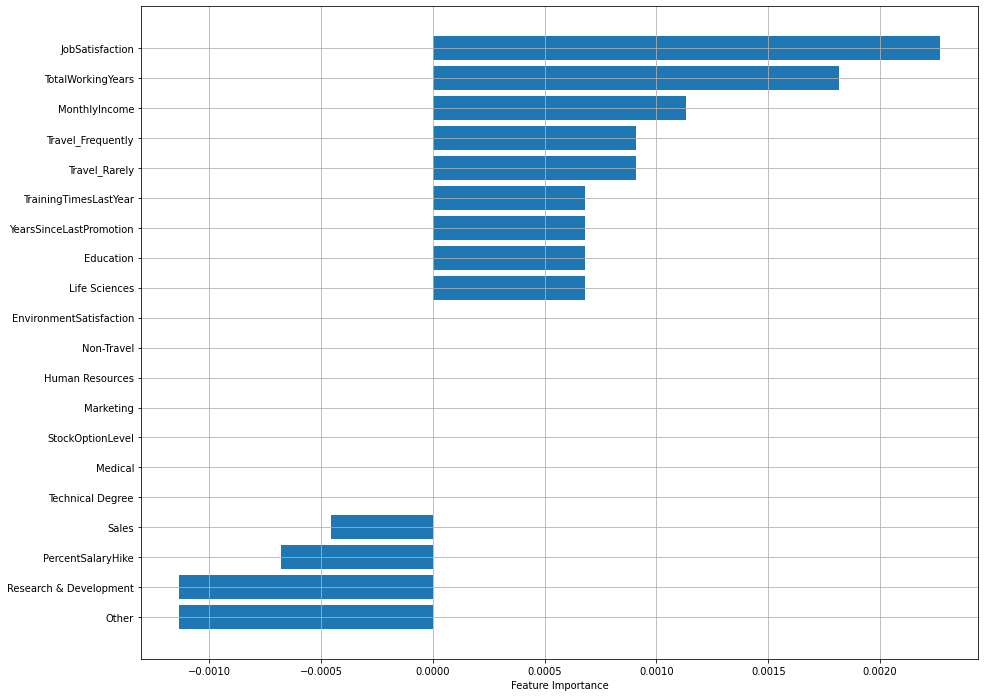

In [24]:
from sklearn.svm import LinearSVC
from sklearn.inspection import permutation_importance

linsvc_final = LinearSVC(C= 0.01)
linsvc_final.fit(X_train,y_train)

perm_importance = permutation_importance(linsvc_final, X_test, y_test)


attributes = num_attribs
attributes.append(cat_one_hot_attribs[0][0])
attributes.append(cat_one_hot_attribs[0][1])
attributes.append(cat_one_hot_attribs[0][2])
attributes.append(cat_one_hot_attribs[1][0])
attributes.append(cat_one_hot_attribs[1][1])
attributes.append(cat_one_hot_attribs[1][2])
attributes.append(cat_one_hot_attribs[2][0])
attributes.append(cat_one_hot_attribs[2][1])
attributes.append(cat_one_hot_attribs[2][2])
attributes.append(cat_one_hot_attribs[2][3])
attributes.append(cat_one_hot_attribs[2][4])
attributes.append(cat_one_hot_attribs[2][5])

features = np.array(attributes)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,12))
plt.grid()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")

## SVC linéaire Metrics

In [25]:
linsvc_general_predictions = linsvc_final.predict(X_test)

### Cross-validation

In [26]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linsvc_final, X_train, y_train, cv=10)

In [27]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.83286119 0.83852691 0.83286119 0.83852691 0.83852691 0.83852691
 0.84135977 0.83852691 0.83806818 0.84375   ]
Mean: 0.8381534895699201
Standard deviation: 0.0031356428069394295


## Matrice de confusion

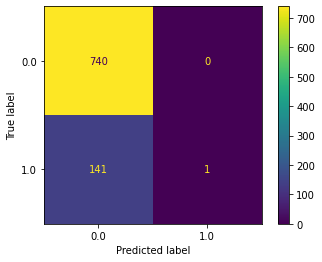

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

linsvc_cm =confusion_matrix(y_test, linsvc_general_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=linsvc_cm,
                              display_labels=linsvc_final.classes_)
disp.plot()
plt.show()

## Precision, Recall et F1 Score

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

linsvc_precision = precision_score(y_test, linsvc_general_predictions)
print("Precision : " + linsvc_precision.astype(str))

linsvc_recall = recall_score(y_test, linsvc_general_predictions)
print("Recall : " + linsvc_recall.astype(str))

linsvc_f1_score = f1_score(y_test, linsvc_general_predictions)
print("F1 Score : " + linsvc_f1_score.astype(str))

Precision : 1.0
Recall : 0.007042253521126761
F1 Score : 0.013986013986013986


In [30]:
from sklearn.metrics import accuracy_score

linsvc_accuracy = accuracy_score(y_test, linsvc_general_predictions)
print("Accuracy : " + linsvc_accuracy.astype(str))

Accuracy : 0.8401360544217688


# Modèle K-Nearest Neighbor (KNN) *Méthode des k plus proches voisins*

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=0)
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
best_params = grid_search.best_params_

Text(0.5, 0, 'Feature Importance')

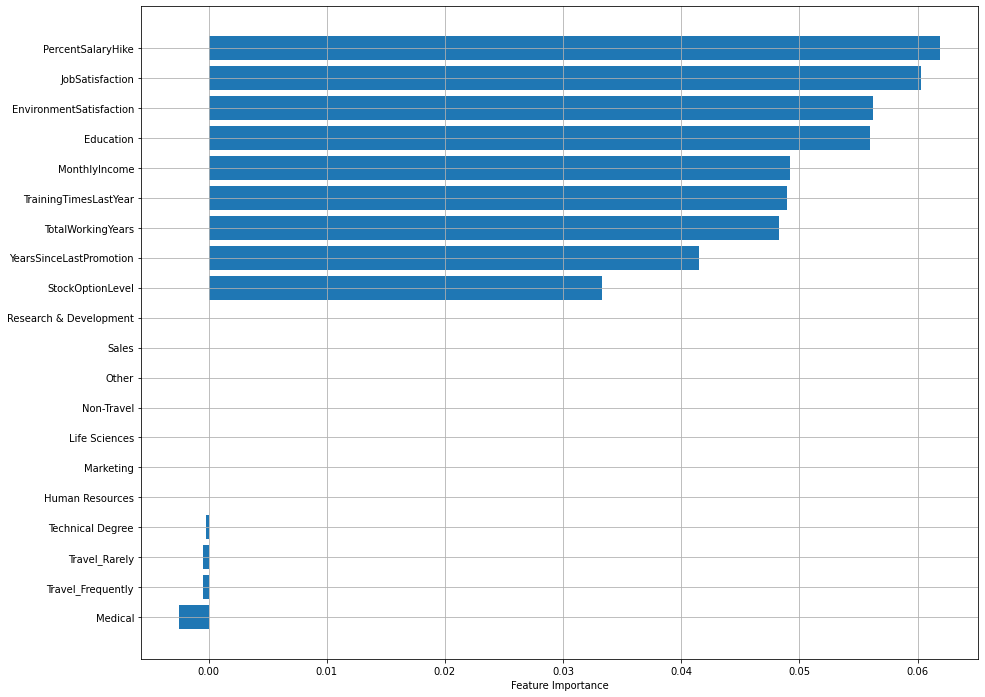

In [32]:
from sklearn.inspection import permutation_importance

knn = KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train,y_train)

perm_importance = permutation_importance(knn, X_test, y_test)

attributes = num_attribs
attributes.append(cat_one_hot_attribs[0][0])
attributes.append(cat_one_hot_attribs[0][1])
attributes.append(cat_one_hot_attribs[0][2])
attributes.append(cat_one_hot_attribs[1][0])
attributes.append(cat_one_hot_attribs[1][1])
attributes.append(cat_one_hot_attribs[1][2])
attributes.append(cat_one_hot_attribs[2][0])
attributes.append(cat_one_hot_attribs[2][1])
attributes.append(cat_one_hot_attribs[2][2])
attributes.append(cat_one_hot_attribs[2][3])
attributes.append(cat_one_hot_attribs[2][4])
attributes.append(cat_one_hot_attribs[2][5])

features = np.array(attributes)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,12))
plt.grid()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")

In [33]:
knn_general_predictions = knn.predict(X_test)

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_train, y_train, cv=10)

In [35]:
display_scores(scores)

Scores: [0.97733711 0.99716714 0.97733711 0.98016997 0.98866856 0.98866856
 0.98583569 0.98583569 0.96590909 0.97443182]
Mean: 0.9821360739119237
Standard deviation: 0.008433564529353796


## Matrice de confusion

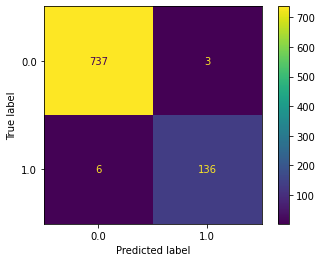

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn_cm = confusion_matrix(y_test, knn_general_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm,
                              display_labels=knn.classes_)
disp.plot()
plt.show()

## Precision, Recall et F1 Score

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

knn_precision = precision_score(y_test, knn_general_predictions)
print("Precision : " + knn_precision.astype(str))

knn_recall = recall_score(y_test, knn_general_predictions)
print("Recall : " + knn_recall.astype(str))

knn_f1_score = f1_score(y_test, knn_general_predictions)
print("F1 Score : " + knn_f1_score.astype(str))

Precision : 0.9784172661870504
Recall : 0.9577464788732394
F1 Score : 0.9679715302491103


In [39]:
from sklearn.metrics import accuracy_score

svc_accuracy = accuracy_score(y_test, knn_general_predictions)
print("Accuracy : " + svc_accuracy.astype(str))

Accuracy : 0.9897959183673469


# Modèle SVC Classifier

In [40]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
  
grid_search=grid.fit(X_train, y_train)


Text(0.5, 0, 'Feature Importance')

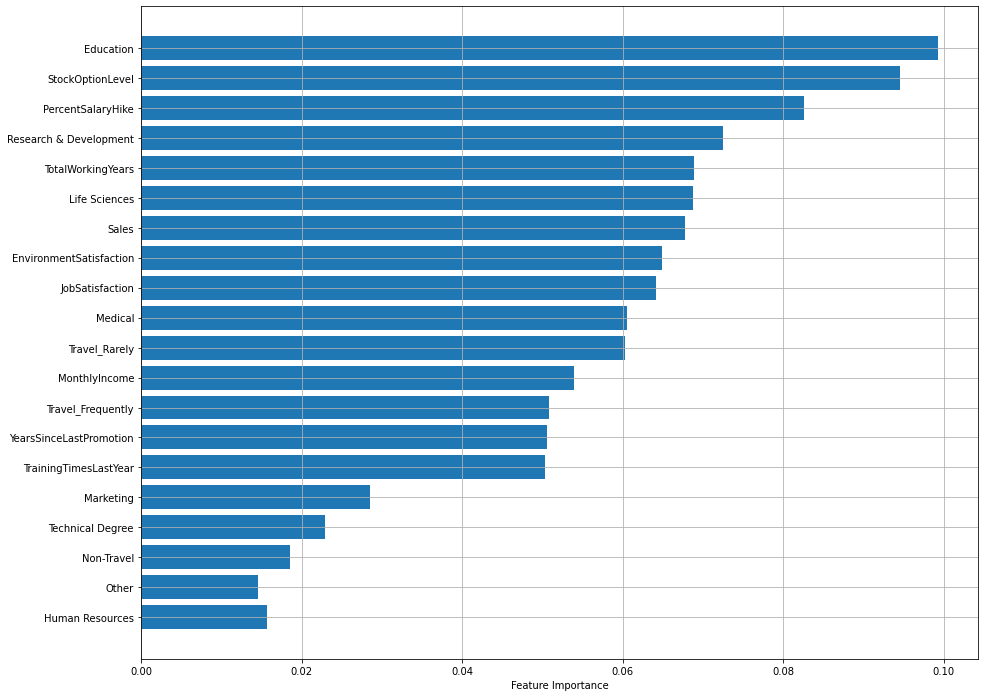

In [41]:
from sklearn.inspection import permutation_importance

svc = SVC(**grid_search.best_params_)
svc.fit(X_train,y_train)

perm_importance = permutation_importance(svc, X_test, y_test)

attributes = num_attribs
attributes.append(cat_one_hot_attribs[0][0])
attributes.append(cat_one_hot_attribs[0][1])
attributes.append(cat_one_hot_attribs[0][2])
attributes.append(cat_one_hot_attribs[1][0])
attributes.append(cat_one_hot_attribs[1][1])
attributes.append(cat_one_hot_attribs[1][2])
attributes.append(cat_one_hot_attribs[2][0])
attributes.append(cat_one_hot_attribs[2][1])
attributes.append(cat_one_hot_attribs[2][2])
attributes.append(cat_one_hot_attribs[2][3])
attributes.append(cat_one_hot_attribs[2][4])
attributes.append(cat_one_hot_attribs[2][5])

features = np.array(attributes)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(15,12))
plt.grid()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importance")

In [42]:
svc_general_predictions = svc.predict(X_test)

In [43]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svc, X_train, y_train, cv=10)

In [44]:
display_scores(scores)

Scores: [0.98583569 1.         0.99150142 0.97733711 0.98583569 0.99716714
 0.98016997 0.98583569 0.98295455 0.98579545]
Mean: 0.9872432719546742
Standard deviation: 0.006737550200948128


## Matrice de confusion

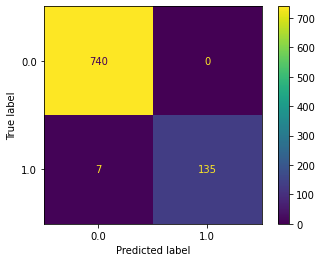

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

svc_cm =confusion_matrix(y_test, svc_general_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                              display_labels=svc.classes_)
disp.plot()
plt.show()

## Precision, Recall et F1 Score

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

svc_precision = precision_score(y_test, svc_general_predictions)
print("Precision : " + svc_precision.astype(str))

svc_recall = recall_score(y_test, svc_general_predictions)
print("Recall    : " + svc_recall.astype(str))

svc_f1_score = f1_score(y_test, svc_general_predictions)
print("F1 Score  : " + svc_f1_score.astype(str))

Precision : 1.0
Recall    : 0.9507042253521126
F1 Score  : 0.9747292418772564


In [47]:
from sklearn.metrics import accuracy_score

svc_accuracy = accuracy_score(y_test, svc_general_predictions)
print("Accuracy : " + svc_accuracy.astype(str))

Accuracy : 0.9920634920634921


# Comparaison des modèles

## AUC *(zone sous la courbe ROC)*
L'AUC correspond à la probabilité pour qu'un événement positif soit classé comme positif par le test sur l'étendue des valeurs seuil possibles.

AUC signifie "Area under the ROC Curve" (aire sous la courbe ROC). C'est-à-dire que l'AUC mesure toute l'aire à deux dimensions sous l'intégralité de la courbe ROC (pensez au calcul total) de (0,0) à (1,1).

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

#Calcul fpr, tpr, thresholds for each algo
fpr_linsvc, tpr_linsvc, thresholds_linsvc = roc_curve(y_test, linsvc_general_predictions)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_general_predictions)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_general_predictions)

#Calculate AUC
auc_linsvc = roc_auc_score(y_test, linsvc_general_predictions)
print("LinearSVC AUC : "+ auc_linsvc.astype(str))
auc_knn = roc_auc_score(y_test, knn_general_predictions)
print("KNN AUC       : "+ auc_knn.astype(str))
auc_svc = roc_auc_score(y_test, svc_general_predictions)
print("SVC AUC       : "+ auc_svc.astype(str))

LinearSVC AUC : 0.5035211267605634
KNN AUC       : 0.9768462124095927
SVC AUC       : 0.9753521126760563


## Courbe ROC
Une courbe ROC (Receiver Operating Characteristic) est un graphique qui montre les performances d'un modèle de classification à tous les seuils de classification. Cette courbe représente deux paramètres:
*   Taux de vrais positifs
*   Taux de faux positifs




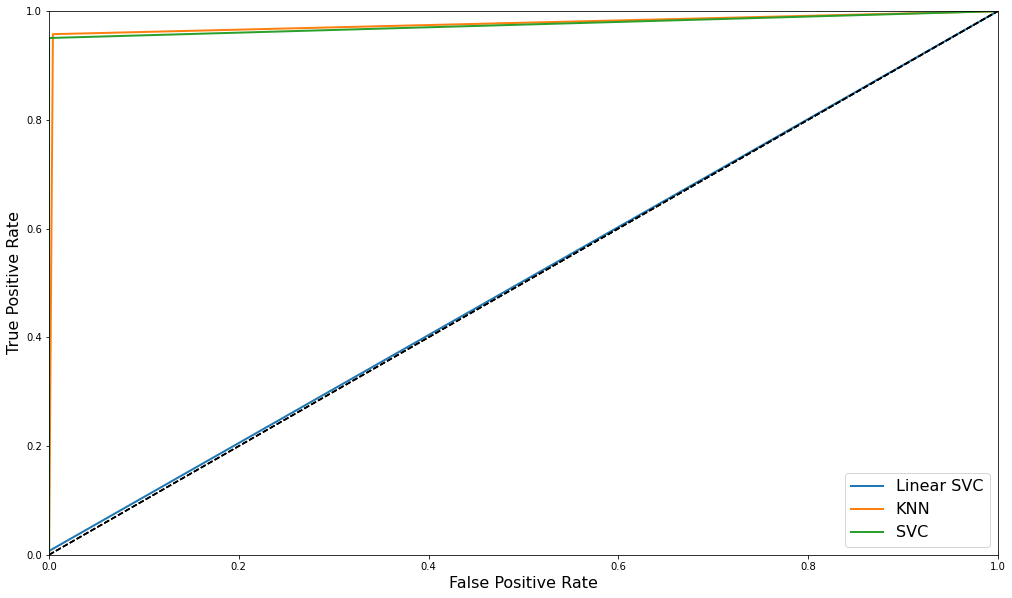

In [49]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(17, 10))
plot_roc_curve(fpr_linsvc, tpr_linsvc, "Linear SVC")
plot_roc_curve(fpr_knn, tpr_knn, "KNN")
plot_roc_curve(fpr_svc, tpr_svc, "SVC")
plt.legend(loc="lower right", fontsize=16)
plt.show()

## Zero One Classification Loss
Il renvoie un nombre de classifications erronées ou une fraction de classifications erronées. Elle accepte le paramètre normalize dont la valeur, si elle est fixée à True, renvoie une fraction des erreurs de classification, sinon, si elle est fixée à False, elle renvoie des erreurs de classification.

Scikit-learn fournit une fonction appelée "zero_one_loss()" dans le sous-module "metrics". Nous devons fournir les étiquettes cibles réelles et prédites pour calculer **zero one classification loss**.

In [50]:
from sklearn.metrics import zero_one_loss

print('LinearSVC - Number of Misclassificied Examples   : ',zero_one_loss(y_test, linsvc_general_predictions, normalize=False))
print('KNN       - Number of Misclassificied Examples   : ',zero_one_loss(y_test, knn_general_predictions, normalize=False))
print('SVC       - Number of Misclassificied Examples   : ',zero_one_loss(y_test, svc_general_predictions, normalize=False))
print('LinearSVC - Fraction of Misclassificied Examples : ',zero_one_loss(y_test, linsvc_general_predictions))
print('KNN       - Fraction of Misclassificied Examples : ',zero_one_loss(y_test, knn_general_predictions))
print('SVC       - Fraction of Misclassificied Examples : ',zero_one_loss(y_test, svc_general_predictions))


LinearSVC - Number of Misclassificied Examples   :  141
KNN       - Number of Misclassificied Examples   :  9
SVC       - Number of Misclassificied Examples   :  7
LinearSVC - Fraction of Misclassificied Examples :  0.15986394557823125
KNN       - Fraction of Misclassificied Examples :  0.010204081632653073
SVC       - Fraction of Misclassificied Examples :  0.007936507936507908


# Visualisation des données

In [51]:
general['Attrition'] = label
general.head(2)

,BusinessTravel,Department,Education,EducationField,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,Attrition
0,Travel_Rarely,Sales,2,Life Sciences,131160,11,0,1.0,6,0,3.0,4.0,0.0
1,Travel_Frequently,Research & Development,1,Life Sciences,41890,23,1,6.0,3,1,3.0,2.0,1.0


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

## Répartition de l'Attrition sur l'ensemble des attributs


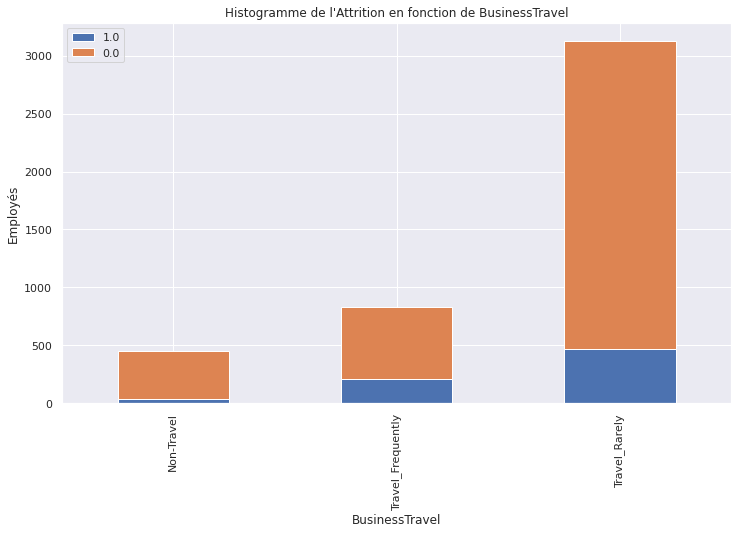

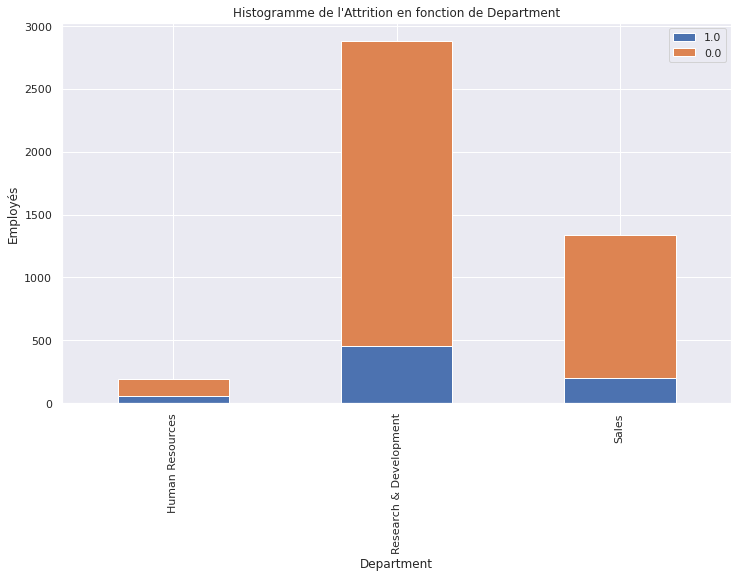

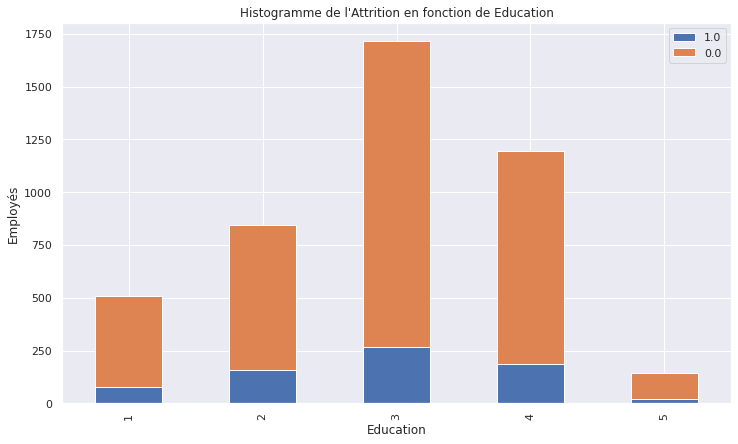

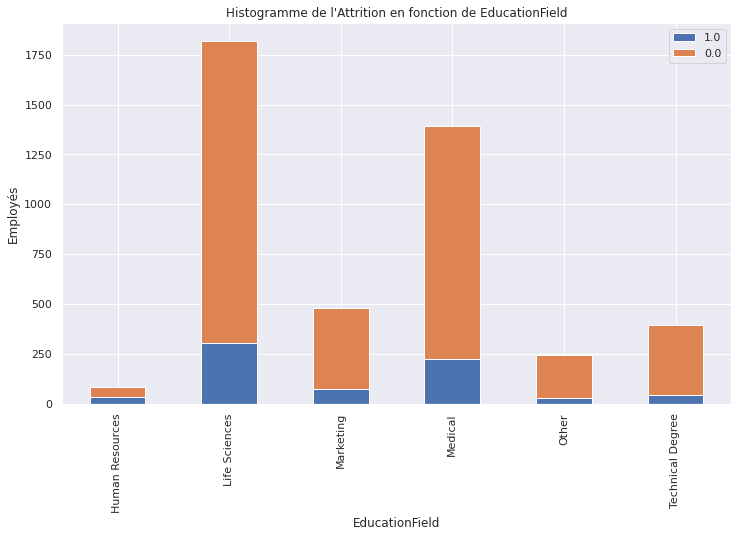

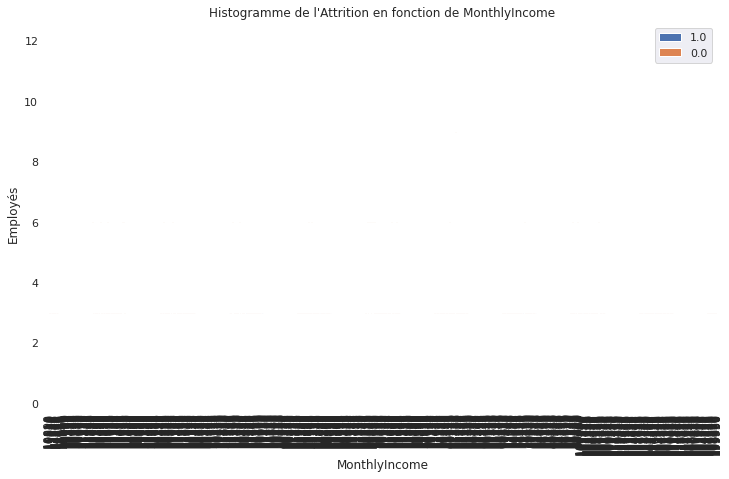

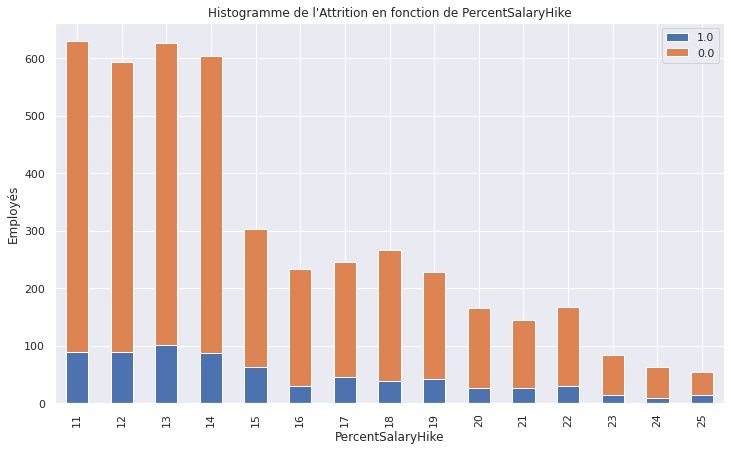

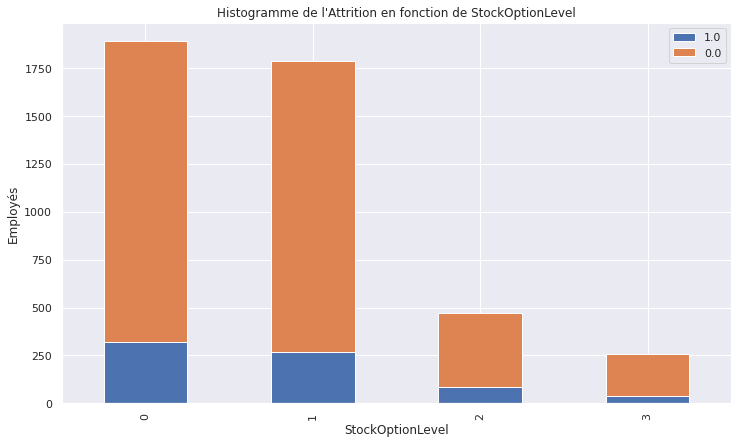

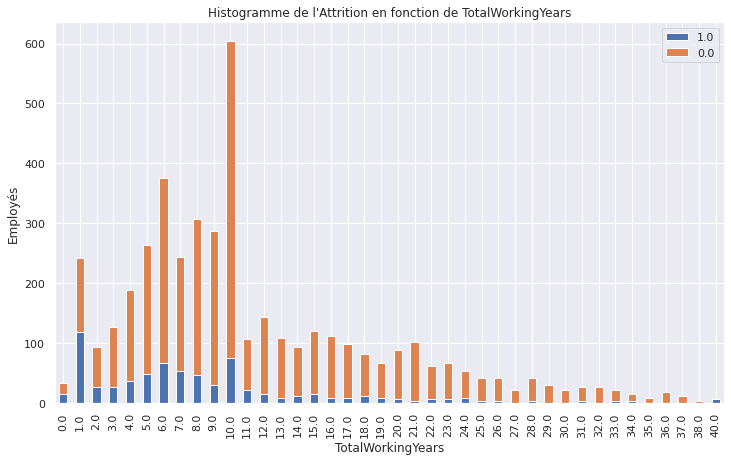

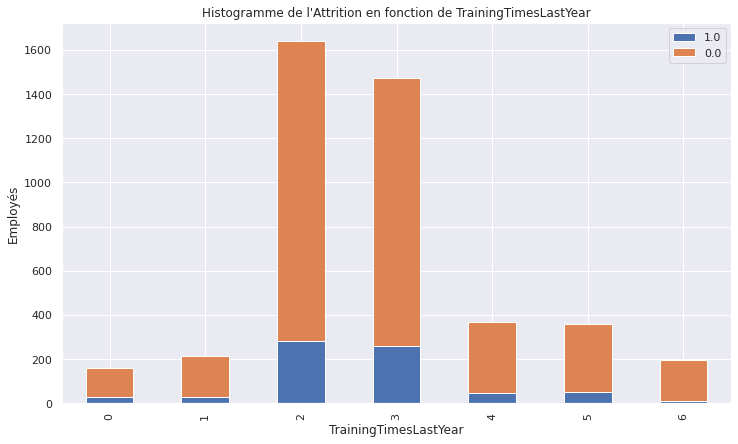

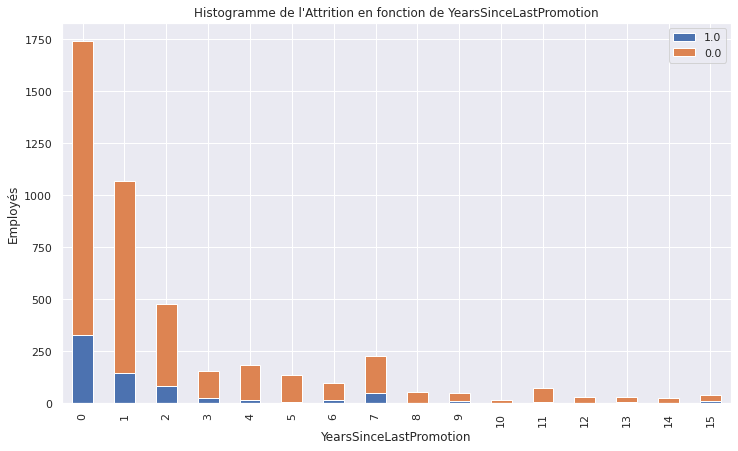

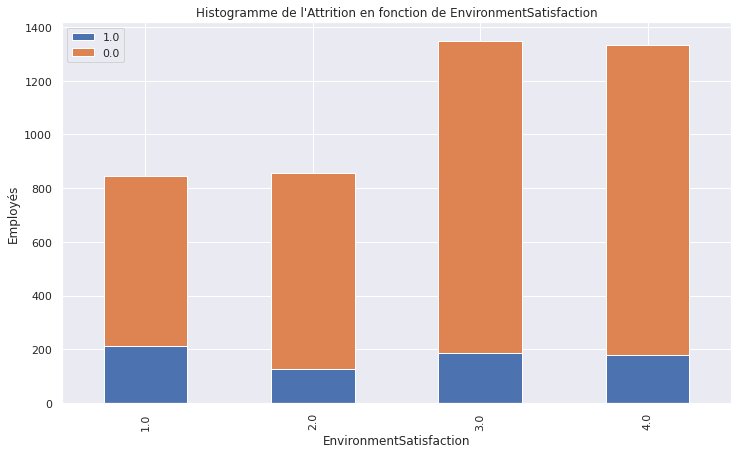

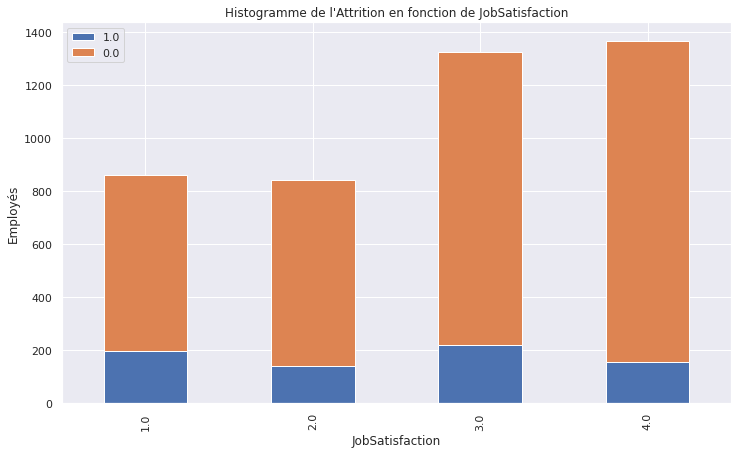

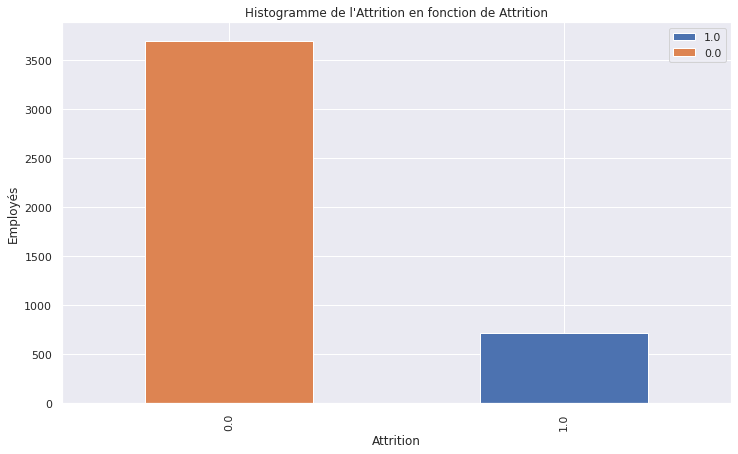

In [53]:
def create_hist(column): # Calcul des fréquences pour chaque combinaison de valeurs
  freq = general.groupby([column,'Attrition']).size().unstack(fill_value=0)
  # Inversion de l'ordre des colonnes dans le dataframe
  freq = freq[freq.columns[::-1]]
  # Création de l'histogramme empilé
  ax = freq.plot(kind='bar', stacked=True, figsize=(12, 7))
  plt.title("Histogramme de l'Attrition en fonction de "+column)
  plt.ylabel('Employés')
  plt.legend()
  plt.show()

for column in general.columns:
  create_hist(column)

## Histogramme repartition note globale caculé avec EnvironnementSatisfaction et JobSatisfaction pour chacun des employés qui ont quitté l'entreprise.

Ici un exemple du type de graphiques qu'il faudrait visualiser, afin de comprendre plus en détail pourquoi il y a un tel taux de départ au sein de l'entreprise.


Text(0, 0.5, 'Employés partis')

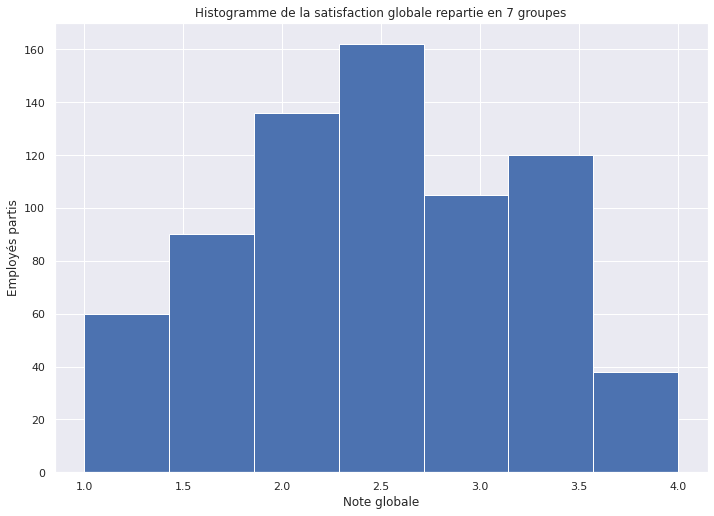

In [54]:
lignes_avec_1 = general.loc[general['Attrition'] == 1.0]
moyenne = lignes_avec_1[['EnvironmentSatisfaction', 'JobSatisfaction']].mean(axis=1)
moyenne.hist(bins=7)
plt.title("Histogramme de la satisfaction globale repartie en 7 groupes")
plt.xlabel('Note globale')
plt.ylabel('Employés partis')